# New Section

In [16]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")
import os

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   README.rst
 BAAD16DATASET			   requirements
 bengali_stemmer		   samledata.csv
 bengali-stemmer-dev		   setup.cfg
 bengali_stemmer.egg-info	   setup.py
 bengali_word2vec		   stemmer.ipynb
 bengali_word2vec.model		   Stopwords.csv
 bn_glove.39M.300d.txt		   stopwordsnew.csv
 build				   tests
 cc.bn.300.vec			   try_w2v.ipynb
'Copy of ulm_train.csv'		   ulm1.csv
 dist				   ulm2.csv
 LICENSE			   wbc.ipynb
'naivebias on bangla news.ipynb'   word2vec.ipynb
'new data.ipynb'		  'word2veclast try.ipynb'
 pytest.ini


In [ ]:
#%cd /gdrive/My Drive/SM_FRIEND_NEWSDATA

[Errno 2] No such file or directory: '/gdrive/My Drive/SM_FRIEND_NEWSDATA'
/content


In [3]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("ulm*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
     label                                               text  is_valid
0       ij  None বছর কয়েক হল সাদিয়া আর আশরাফ সুন্দরবনের বই...     False
1       fe  আমাদের জীবনচিত্রে যুদ্ধাপরাধীদের ছায়া আমাদের জ...     False
2       mk  নির্ভীক নেতৃত্বই উন্নয়নের সোপান ২৬ জুলাই (২০১৪...     False
3       rg  গ্রিসের স্ট্রবেরি খামারে বাংলাদেশিদের উপর গুলি...     False
4       ij  গল্প_ পাখিপুর সকালবেলায় চা শেষ করে একটা সিগারে...     False
...    ...                                                ...       ...
2095    rn  রহস্যময় বিতর্কিত পুরুষ রাসপুতিন ইতিহাস কি শুধু...     False
2096    fe  রাজনৈতিক মূর্খতা ও মুক্তিযুদ্ধের মৌলিক ফসল রাজ...     False
2097    mk  ইউপি ইলেকশন এবং ___ বাংলাদেশের তিন স্তরবিশিষ্ট...     False
2098    rn  মনে করি, A হলো একটি সফল জীবন। A=x+y+z, এখানে x...     False
2099    fe  বহির্বিশ্বে বাংলা সাহিত্য-সংস্কৃতির বীজ ও বীক্...     False

[2100 rows x 3 columns]


In [ ]:
#new clean data
#data = pd.read_csv('ulm_train.csv').apply(lambda x: x.astype(str).str.lower())

In [4]:
data.drop_duplicates(keep=False, inplace=True)

In [5]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [6]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [7]:
import re
def cleanhtml(sentence):
    cleanr1 = re.compile('/.*?')
    cleantext = re.sub(cleanr1,' ',sentence)
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

In [8]:

def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [9]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word1 in cleanhtml(w).split():
                for cleaned_word in clean_punct(cleaned_word1).split():
                    if len(cleaned_word)>2:
                        if(to_encode(cleaned_word) not in set_stop):
                            s = stemmer.stem_word(cleaned_word)
                            if len(s)>2:
                                final_words.append(s)
                                filtered_sentence.append(s)
                        else:
                            continue
                    else:
                        continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [10]:
X = pre_process(data['text'].values)
#y = data['label'].values

In [11]:
Y = data['label'].values

In [45]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.1,random_state=42) # this is random splitting

In [46]:
label=np.unique(y_train)

label

array(['fe', 'hm', 'ij', 'mk', 'rg', 'rn'], dtype=object)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(X_train) # fit has to happen only on train data

W2VEC MODEL

In [48]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

In [49]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [50]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=300, workers=10)

In [51]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  20079
sample words  ['লাশ', 'অবরোধ', 'সহিংসত', 'শিক', 'প্রাণ', 'হারা', 'দুজন', 'নিরীহ', 'ব্যক্তি', 'একজন', 'ট্রাকচালক', 'সহকারী', 'আবদুর', 'রশিদ', 'মেডিক', 'কলেজ', 'হাসপাতাল', 'গতকাল', 'অপরজন', 'সিলেট', 'বকুল', 'দেবনাথ', 'সকাল', 'দুর্বৃত্ত', 'পেট্রলবোমা', 'হামলা', 'সপ্তাহ', 'খানেক', 'দগ্ধ', 'চট্টগ্রাম', 'সীতাকুণ্ড', 'ট্রা', 'আগুন', 'পুড়', 'দুট', 'ট্রাক', 'সিরাজগঞ্জ', 'যাত্রীবাহী', 'বাস', 'চাঁদপুর', 'জেলা', 'প্রশাসক', 'বাসভবন', 'নেতৃত্বাধীন', 'দলী', 'জোট', 'ডাকা', 'এদিন', 'সন্ধ্যা', 'ঘণ্']


In [52]:
from tqdm import tqdm
import numpy as np

CONVERT TRAINDATA TEXT

In [53]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors_train = np.array(sent_vectors)
#print(np.asarray(sent_vectors).shape)
#print(sent_vectors[0])

#print(np.asarray(X).shape)

100%|██████████| 1596/1596 [03:10<00:00,  8.36it/s]


CONVERTING CV DATA TEXT

In [54]:
i=0
list_of_sentance_cv=[]
for sentance in X_cv:
    list_of_sentance_cv.append(sentance.split())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)
#print(np.asarray(sent_vectors_cv).shape)
#print(sent_vectors_cv[0])

100%|██████████| 178/178 [00:19<00:00,  8.94it/s]


CONVERTING TEST DATA TEXT

In [56]:
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [57]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
#print(np.asarray(sent_vectors_test).shape)
#print(sent_vectors_test[0])

100%|██████████| 198/198 [00:25<00:00,  7.68it/s]


FIT WITH A MODEL 
# **GaussianNB classifier**

In [58]:
from sklearn . naive_bayes import GaussianNB
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn . model_selection import cross_val_score

In [59]:
Gmodel = GaussianNB() . fit ( sent_vectors , y_train )

 #neigh.fit(sent_vectors_train, y_train)

# *Cross validation for gaussian nb*

In [ ]:
#using k-fold

accuracy = cross_val_score(Gmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.59090909 0.36363636 0.5        0.25       0.59090909 0.36363636
 0.48837209 0.41860465 0.46511628 0.39534884]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 44.26532769556025


In [ ]:
#using cross_validate() function

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(Gmodel, sent_vectors_cv, y_cv, scoring=scoring)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [ ]:
scores['test_recall_macro']

array([0.39066952, 0.39663604, 0.43947964, 0.4508966 , 0.41138763])

# *accuracy for test data*

In [60]:
from sklearn . metrics import classification_report

In [61]:

y_test_pred  = Gmodel . predict ( sent_vectors_test )


In [ ]:
#trainig accuracy for gaussian neigh bayes
y_train_pred = Gmodel . predict(sent_vectors)
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 0.5016949152542373


In [62]:

print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred ) )

#xlabels . append ( "Gaussian" )
#ylabels . append ( accuracy_score ( y_test , y_test_pred ) ) 

Model accuracy 0.4444444444444444
accuracy normalized 88
              precision    recall  f1-score   support

          fe       0.35      0.55      0.43        33
          hm       0.31      0.64      0.42        25
          ij       0.58      0.48      0.53        31
          mk       0.62      0.61      0.62        33
          rg       0.38      0.21      0.27        38
          rn       0.69      0.29      0.41        38

    accuracy                           0.44       198
   macro avg       0.49      0.46      0.44       198
weighted avg       0.50      0.44      0.44       198



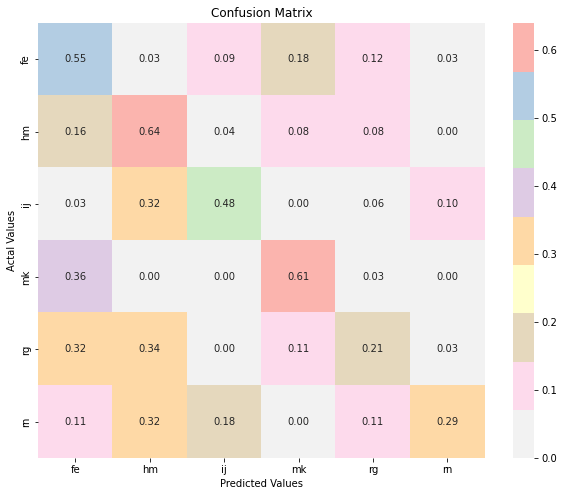

In [63]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(label)

['fe' 'hm' 'ij' 'mk' 'rg' 'rn']


In [ ]:
label=np.array(['fe', 'humayun', 'ij', 'mk', 'rg', 'rn'], dtype=object)

# **SVM classifier**

In [64]:
import sklearn
from sklearn import svm
from sklearn . model_selection import cross_val_score

In [65]:
smodel = svm . SVC ( C = 3, gamma = 'scale', kernel = 'rbf' )

smodel . fit ( sent_vectors , y_train )



SVC(C=3)

# *Cross validation score for svm*

In [ ]:
#using k-fold

accuracy = cross_val_score(smodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

#get the mean of each fold 
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.52 0.39 0.41 0.23 0.52 0.39 0.49 0.37 0.53 0.47]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 43.15010570824525


**Train** **accuracy**

In [ ]:
y_train_pred  = smodel . predict ( sent_vectors )

In [ ]:
print ( 'Model accuracy %s' % accuracy_score (  y_train , y_train_pred ) )

Model accuracy 0.5570621468926553


# *accuracy score for test data*

In [66]:
from sklearn . metrics import classification_report
y_test_pred  = smodel . predict ( sent_vectors_test )
#y_cv_pred = smodel . predict(sent_vectors_cv)

In [ ]:
label=np.unique(y_train)

In [67]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred ) )

Model accuracy 0.5707070707070707
accuracy normalized 113
              precision    recall  f1-score   support

          fe       0.43      0.61      0.51        33
          hm       0.46      0.48      0.47        25
          ij       0.74      0.65      0.69        31
          mk       0.59      0.61      0.60        33
          rg       0.53      0.45      0.49        38
          rn       0.73      0.63      0.68        38

    accuracy                           0.57       198
   macro avg       0.58      0.57      0.57       198
weighted avg       0.59      0.57      0.57       198



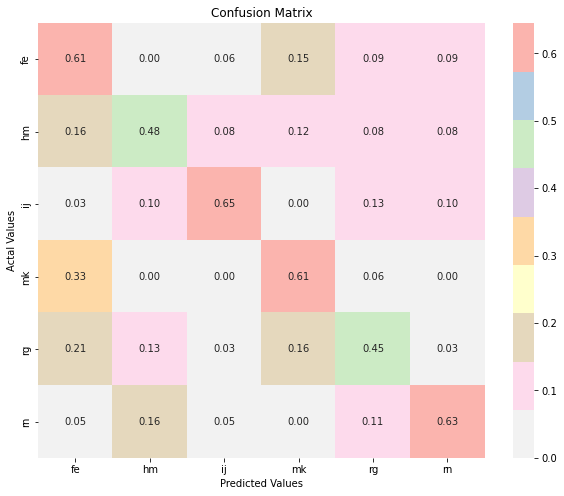

In [68]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **logistic regression**

In [69]:
from sklearn.linear_model import LogisticRegression
Lmodel = LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' )

In [70]:
Lmodel . fit ( sent_vectors , y_train )

LogisticRegression(multi_class='ovr')

## cross validation score for logistic regression 

In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn . model_selection import cross_val_score
accuracy = cross_val_score(Lmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.5  0.43 0.5  0.3  0.59 0.48 0.51 0.47 0.58 0.47]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 48.18710359408034


In [71]:
from sklearn . metrics import classification_report
from sklearn . model_selection import cross_val_score

y_test_pred  = Lmodel . predict ( sent_vectors_test )
y_train_pred = Lmodel . predict(sent_vectors)

In [ ]:
#train accuracy
print ( 'Model accuracy %s' % accuracy_score (  y_train , y_train_pred ) )

Model accuracy 0.5310734463276836


In [72]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label  ) )

Model accuracy 0.5959595959595959
accuracy normalized 118
              precision    recall  f1-score   support

          fe       0.48      0.61      0.53        33
          hm       0.52      0.52      0.52        25
          ij       0.79      0.74      0.77        31
          mk       0.55      0.64      0.59        33
          rg       0.61      0.45      0.52        38
          rn       0.67      0.63      0.65        38

    accuracy                           0.60       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.61      0.60      0.60       198



In [ ]:
label=np.array(['fe', 'humayun', 'ij', 'mk', 'rg', 'rn'], dtype=object)

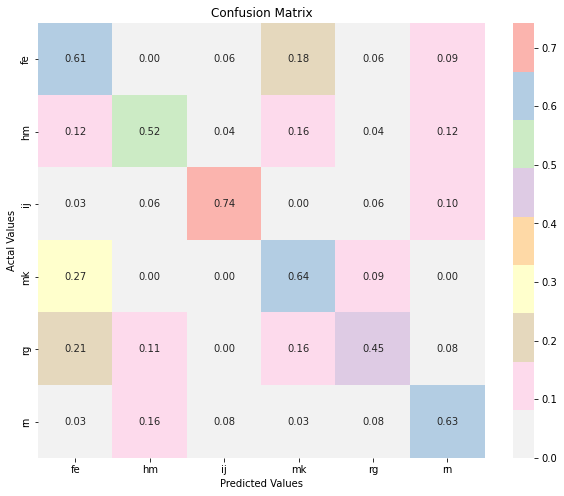

In [73]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **Random Forest**

In [74]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier ( n_estimators=100 )

In [75]:
Rmodel . fit ( sent_vectors , y_train )

RandomForestClassifier()

# **CROSS VALIDATION**

In [ ]:
accuracy = cross_val_score(Rmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.5  0.57 0.57 0.41 0.68 0.55 0.53 0.49 0.63 0.49]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 54.122621564482046


# **CLASSIFICATION REPORT**

In [76]:
from sklearn . metrics import classification_report
from sklearn . model_selection import cross_val_score

y_test_pred  = Rmodel . predict ( sent_vectors_test )
y_train_pred = Rmodel . predict(sent_vectors)

In [ ]:
#training accuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 1.0


In [77]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label) )

Model accuracy 0.6212121212121212
accuracy normalized 123
              precision    recall  f1-score   support

          fe       0.56      0.61      0.58        33
          hm       0.52      0.48      0.50        25
          ij       0.76      0.71      0.73        31
          mk       0.55      0.67      0.60        33
          rg       0.60      0.55      0.58        38
          rn       0.74      0.68      0.71        38

    accuracy                           0.62       198
   macro avg       0.62      0.62      0.62       198
weighted avg       0.63      0.62      0.62       198



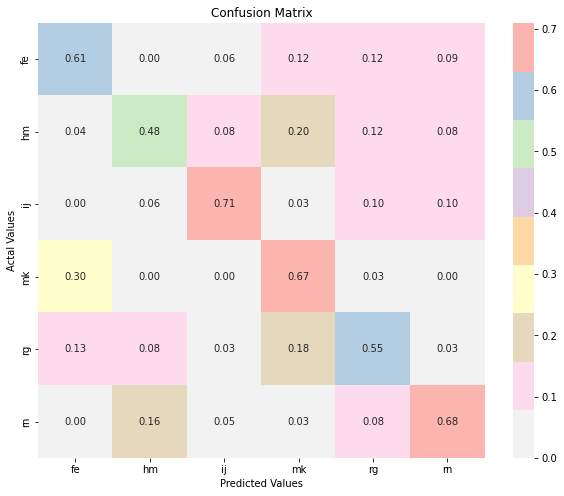

In [78]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **Decission Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier ()                

In [80]:
Dmodel . fit ( sent_vectors , y_train )

DecisionTreeClassifier()

# **CROSS VALIDATION**

In [ ]:
accuracy = cross_val_score(Dmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.48 0.57 0.39 0.39 0.43 0.36 0.58 0.42 0.53 0.3 ]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 44.50845665961944


In [81]:
y_test_pred  = Dmodel . predict ( sent_vectors_test )
y_train_pred = Dmodel . predict(sent_vectors)

In [ ]:
#trainaccuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 1.0


In [82]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names = label ) )

Model accuracy 0.5606060606060606
accuracy normalized 111
              precision    recall  f1-score   support

          fe       0.46      0.58      0.51        33
          hm       0.45      0.56      0.50        25
          ij       0.90      0.58      0.71        31
          mk       0.45      0.52      0.48        33
          rg       0.59      0.53      0.56        38
          rn       0.68      0.61      0.64        38

    accuracy                           0.56       198
   macro avg       0.59      0.56      0.57       198
weighted avg       0.59      0.56      0.57       198



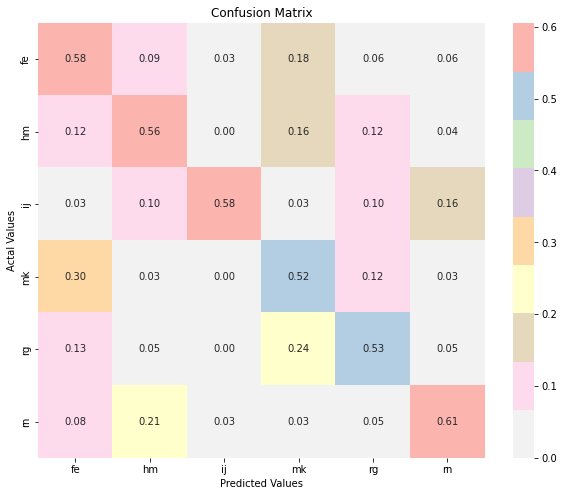

In [83]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **Multinomial Naivebayes(sklearn data transformation)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
Mmodel=make_pipeline(Binarizer(), MultinomialNB())

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(sent_vectors_train)
sent_vectors_train_transformed = scaler.transform(sent_vectors_train)

In [ ]:
Mmodel.fit(sent_vectors_train_transformed, y_train)

Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

# CROSS VALIDATION 

In [ ]:
#using k-fold
accuracy = cross_val_score(Mmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.52 0.27 0.43 0.2  0.43 0.32 0.47 0.44 0.51 0.37]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 39.72515856236786


In [ ]:
sent_vectors_test_transformed = scaler.transform(sent_vectors_test)
y_test_pred  = Mmodel. predict ( sent_vectors_test_transformed )
y_train_pred = Mmodel.predict (sent_vectors)

In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score

In [ ]:
#train accuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 0.23728813559322035


In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label ))

Model accuracy 0.40706605222734255
accuracy normalized 265
              precision    recall  f1-score   support

          fe       0.21      0.14      0.17       113
     humayun       0.38      0.59      0.47        68
          ij       0.46      0.23      0.31       104
          mk       0.41      0.78      0.53       116
          rg       0.45      0.23      0.31       124
          rn       0.50      0.52      0.51       126

    accuracy                           0.41       651
   macro avg       0.40      0.42      0.38       651
weighted avg       0.41      0.41      0.38       651



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[16  2  2 78  9  6]
 [ 6 40  5  5  2 10]
 [ 0 24 24  2  9 45]
 [19  2  0 90  5  0]
 [22 18  9 40 29  6]
 [13 18 12  7 10 66]]
Normalized confusion matrix
[[0.14 0.02 0.02 0.69 0.08 0.05]
 [0.09 0.59 0.07 0.07 0.03 0.15]
 [0.   0.23 0.23 0.02 0.09 0.43]
 [0.16 0.02 0.   0.78 0.04 0.  ]
 [0.18 0.15 0.07 0.32 0.23 0.05]
 [0.1  0.14 0.1  0.06 0.08 0.52]]


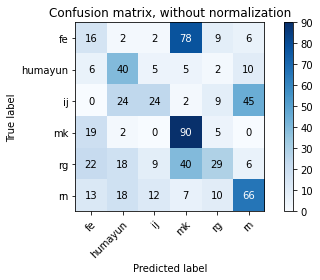

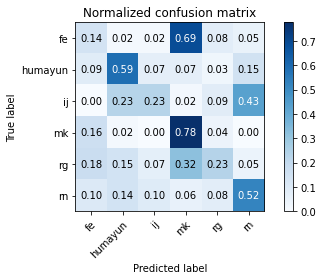

In [ ]:
label=np.array(['fe', 'humayun', 'ij', 'mk', 'rg', 'rn'], dtype=object)
def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()